In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import talib

df = pd.read_csv(r"C:\Users\user\Desktop\week 1 data\yfinance_data\yfinance_data\AAPL_historical_data.csv")
df.head(5)


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [3]:
df = df.sort_values('Date').reset_index(drop=True)

df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)


In [4]:
# SMA - 20 day Simple Moving Average
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)

# RSI - 14 period Relative Strength Index
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)

# MACD - Moving Average Convergence Divergence
macd, macd_signal, macd_hist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACD_signal'] = macd_signal
df['MACD_hist'] = macd_hist


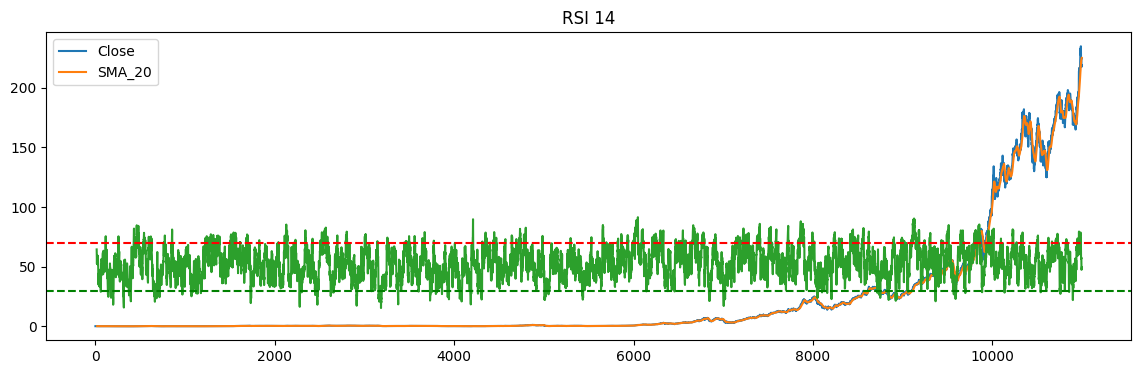

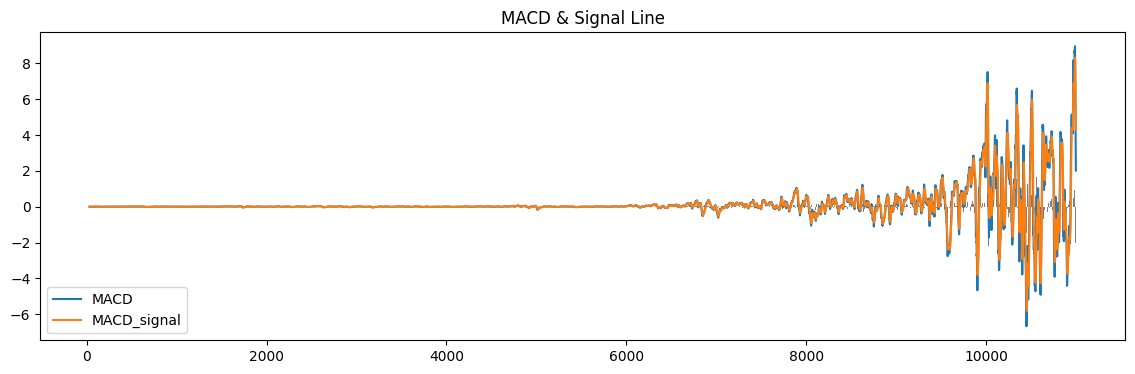

In [ ]:
df[['Close', 'SMA_20']].plot(figsize=(14, 6), title='AAPL Close Price and 20-day SMA')

# RSI
df['RSI_14'].plot(figsize=(14, 4), title='RSI 14')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.show()

# MACD
df[['MACD', 'MACD_signal']].plot(figsize=(14, 4), title='MACD & Signal Line')
plt.bar(df.index, df['MACD_hist'], color='gray')
plt.show()


Pynanace

In [5]:
import pynance as pn
import pandas as pd

df = pn.data.get('AAPL', start='1980-01-01', end='2024-01-01')
df.tail()


,Open,High,Low,Close,Volume
Date,,,,,
1984-09-13,0.103232,0.103526,0.103232,0.103232,246058991
1984-09-12,0.100827,0.101417,0.097791,0.097791,157987052
1984-09-11,0.099910,0.102620,0.099910,0.100827,180849030
1984-09-10,0.099605,0.099910,0.097210,0.099014,76694011
1984-09-07,0.099605,0.100827,0.098402,0.099605,98811715


In [6]:
#SMA
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_20']

Date
2023-12-29         NaN
2023-12-28         NaN
2023-12-27         NaN
2023-12-26         NaN
2023-12-22         NaN
                ...   
1984-09-13    0.097549
1984-09-12    0.097955
1984-09-11    0.098377
1984-09-10    0.098663
1984-09-07    0.098978
Name: SMA_20, Length: 9908, dtype: float64

In [7]:
#Relative Strength Index (RSI)

delta = df['Close'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss
df['RSI_14'] = 100 - (100 / (1 + rs))

df['RSI_14']


Date
2023-12-29          NaN
2023-12-28          NaN
2023-12-27          NaN
2023-12-26          NaN
2023-12-22          NaN
                ...    
1984-09-13    70.295749
1984-09-12    59.742733
1984-09-11    65.265132
1984-09-10    58.503543
1984-09-07    55.649970
Name: RSI_14, Length: 9908, dtype: float64

In [8]:
ema12 = df['Close'].ewm(span=12, adjust=False).mean()
ema26 = df['Close'].ewm(span=26, adjust=False).mean()

df['MACD'] = ema12 - ema26
df['MACD_signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
df['MACD_hist'] = df['MACD'] - df['MACD_signal']

df['MACD_hist']

Date
2023-12-29    0.000000
2023-12-28    0.066498
2023-12-27    0.077354
2023-12-26    0.073393
2023-12-22    0.101413
                ...   
1984-09-13    0.000894
1984-09-12    0.000327
1984-09-11    0.000128
1984-09-10   -0.000140
1984-09-07   -0.000282
Name: MACD_hist, Length: 9908, dtype: float64

In [9]:
df['Daily Return'] = df['Close'].pct_change()
df['Daily Return'] 


Date
2023-12-29         NaN
2023-12-28    0.005445
2023-12-27   -0.002214
2023-12-26   -0.000521
2023-12-22    0.002845
                ...   
1984-09-13   -0.014209
1984-09-12   -0.052703
1984-09-11    0.031042
1984-09-10   -0.017986
1984-09-07    0.005971
Name: Daily Return, Length: 9908, dtype: float64

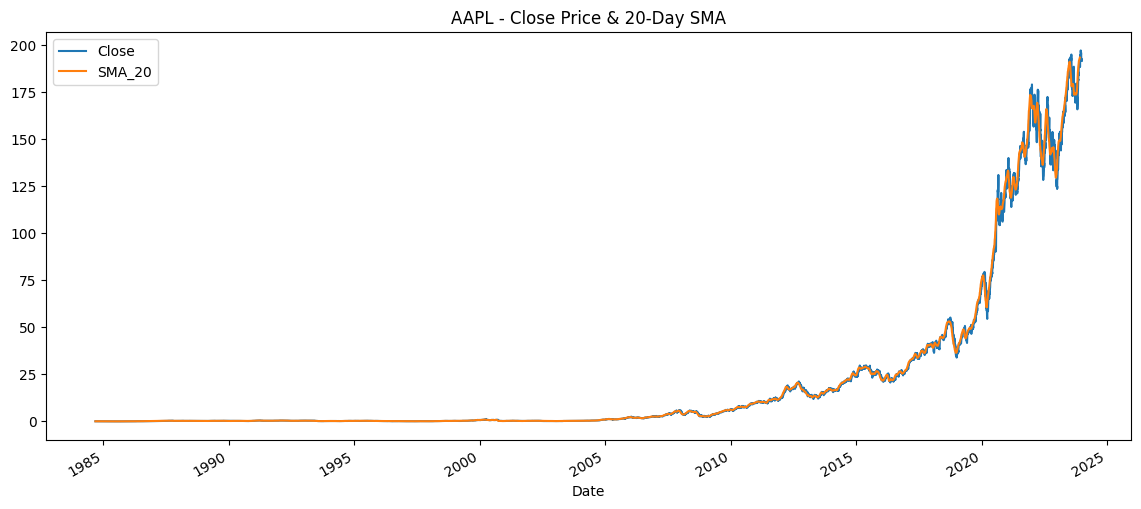

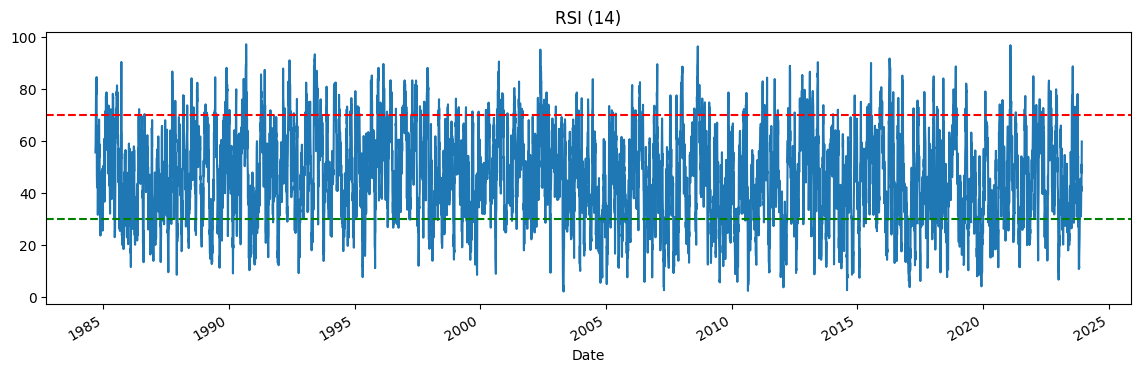

In [10]:
import matplotlib.pyplot as plt

# SMA Plot
df[['Close', 'SMA_20']].plot(figsize=(14,6), title='AAPL - Close Price & 20-Day SMA')
plt.show()

# RSI Plot
df['RSI_14'].plot(figsize=(14,4), title='RSI (14)')
plt.axhline(70, linestyle='--', color='red')
plt.axhline(30, linestyle='--', color='green')
plt.show()
